# Support vector machine

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls
import seaborn as sns
import sklearn.svm as svm
import sklearn.datasets as ds

# Prettier plots
sns.set()

In [2]:
def make_moons_parametrized(n_samples, radius, width, d, **kwargs):
    # 1 sample consists of a pair of A and B
    n_samples *= 2 
    
    # Get moons 
    moons, inds = ds.make_moons(n_samples, shuffle = False, noise = kwargs.get("noise"))
        
    # Extract moons
    moon_a = moons[inds == 0]
    moon_b = moons[inds == 1]

    # Move moon B to origin
    moon_b[:,0] -= 1
    moon_b[:,1] -= 0.5

    # Apply radius and width
    moon_a *= radius
    moon_a *= np.random.uniform((radius - width/2)/radius, (radius + width/2)/radius, moon_a.shape)
    moon_b *= radius
    moon_b *= np.random.uniform((radius - width/2)/radius, (radius + width/2)/radius, moon_b.shape)

    # Move moon B back
    moon_b[:,0] += radius
    moon_b[:,1] -= d
    
    moons = np.append(moon_a, moon_b, 0)
    
    # Shuffle dataset, assumes inds is unshuffled (neccessary?)
    rng_state = np.random.get_state()
    np.random.shuffle(moons)
    np.random.set_state(rng_state)
    np.random.shuffle(inds)
    
    return moons, inds

In [3]:
def classify_and_plot_moons(title, n_train_samples, n_test_samples, radius, width, d, **kwargs):
    # Display horizontally next to each other
    fig, arr = plt.subplots(1, 4, figsize=(16,4))
    
    plt.suptitle(title)
    
    # Create training set
    train_moons, train_indices = make_moons_parametrized(n_train_samples, radius, width, d, noise = kwargs.get("noise"))

    # Create test set
    test_moons, test_indices = make_moons_parametrized(n_train_samples, radius, width, d, noise = kwargs.get("noise"))

    # Plot test set
    a = test_moons[test_indices==0]
    b = test_moons[test_indices==1]
    arr[0].scatter(a[:,0], a[:,1])
    arr[0].scatter(b[:,0], b[:,1])
    arr[0].set_title("ground truth")
    
    subplot_n = 1
    # Try each kernel
    for kernel in ("linear", "poly", "rbf"):
        C = 1.0
        if kwargs.get("C") is not None:
            C = kwargs.get("C")
        probability = False
        if kwargs.get("probability") is not None:
            probability = kwargs.get("probability")
        
        # Create SVM
        clf = svm.SVC(kernel=kernel, C = C, probability = probability)
        
        # Train SVM
        clf.fit(train_moons, train_indices);

        # Test SVM
        result = clf.predict(test_moons)
        
        # Plot results
        a = test_moons[result==0]
        b = test_moons[result==1]
        m = test_moons[result != test_indices]
        arr[subplot_n].scatter(a[:,0], a[:,1], label="A")
        arr[subplot_n].scatter(b[:,0], b[:,1], label="B")
        arr[subplot_n].scatter(m[:,0], m[:,1], label="misclassified")
        arr[subplot_n].set_title(kernel + " kernel")

        subplot_n += 1

    # Make space for suptitle
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.legend()
    plt.show()

In [4]:
# Constant parameters
radius = 10
width = 6
n_train_samples = 1000
n_test_samples = 3000

### Case 1

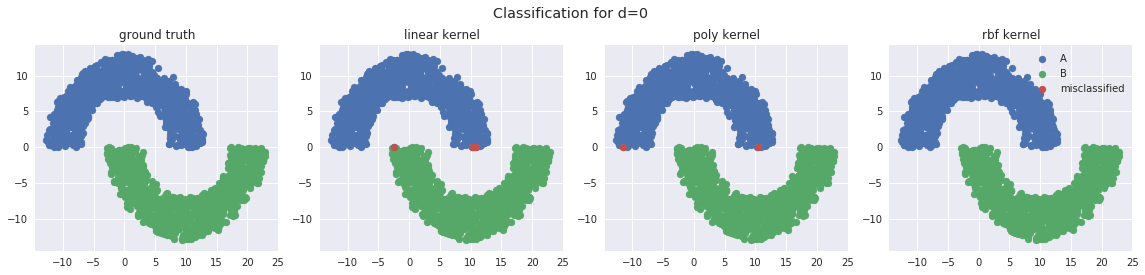

In [5]:
d = 0
classify_and_plot_moons("Classification for d=" + str(d), n_train_samples, n_test_samples, radius, width, d)

### Case 2

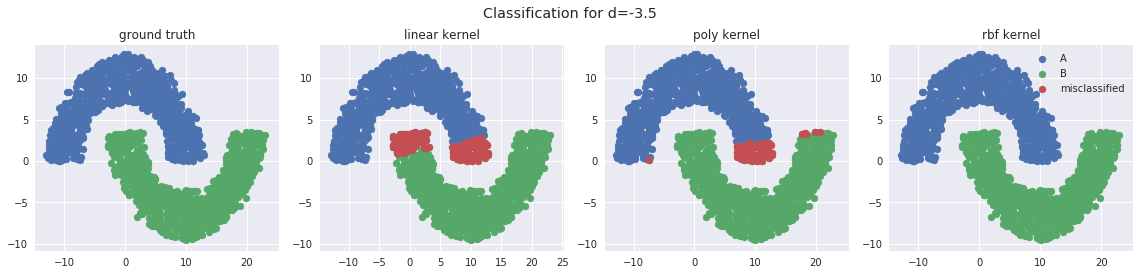

In [6]:
d = -(radius - width/2)/2
classify_and_plot_moons("Classification for d=" + str(d), n_train_samples, n_test_samples, radius, width, d)

### Case 3

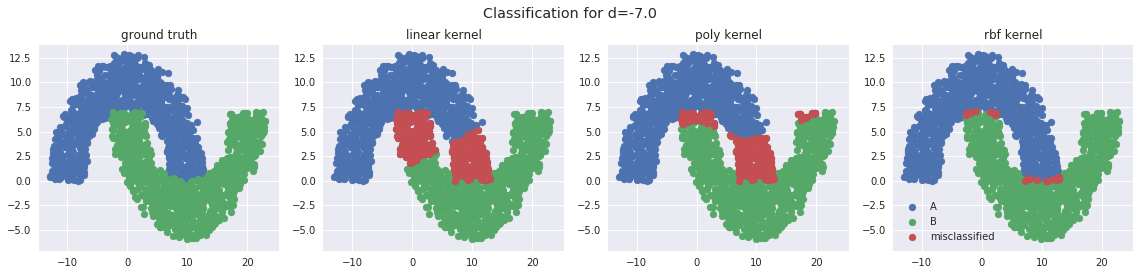

In [7]:
d = -(radius - width/2)
classify_and_plot_moons("Classification for d=" + str(d), n_train_samples, n_test_samples, radius, width, d)

### Case 4

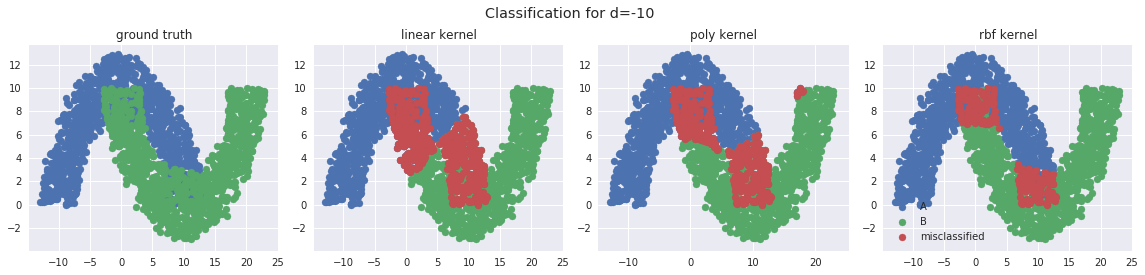

In [8]:
d = -radius
classify_and_plot_moons("Classification for d=" + str(d), n_train_samples, n_test_samples, radius, width, d)

### Case 5

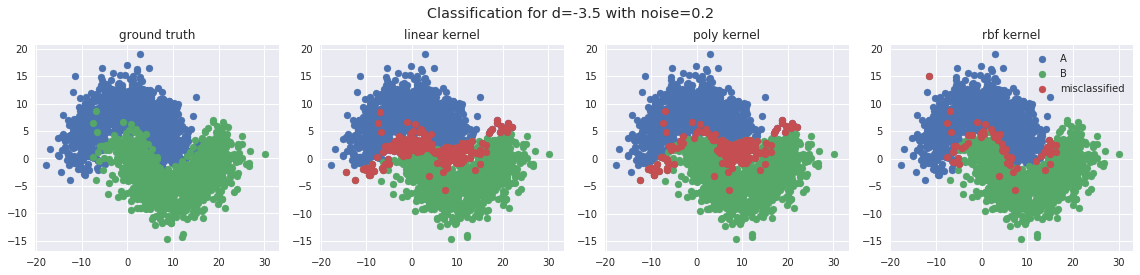

In [9]:
d = -(radius - width/2)/2
noise = 0.2
classify_and_plot_moons("Classification for d=" + str(d) + " with noise=" + str(noise), n_train_samples, n_test_samples, radius, width, d, noise=noise)